### Loading All Needed Libraries

In [1]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Number Manupulation & Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Model Selection Libraries
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

#Preprocessing Libraries
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

#Liner Model Libraries
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#pipeline libraries
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import sklearn
import sklearn.decomposition

from sklearn.svm import SVC
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

<font color=red size=6> Define Objective </font>

<font color=red size=6> Understanding Dataset</font>

In [2]:
#test =pd.read_csv("test_QoiMO9B.csv")
#test.head()

In [3]:
#submission =pd.read_csv("sample_submission_hSlSoT6.csv")
#submission.head()

In [4]:
df_fc = pd.read_csv("fulfilment_center_info.csv")
print(df_fc.shape)
df_fc.head()

(77, 5)


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
df_meal = pd.read_csv("meal_info.csv")
print(df_meal.shape)
df_meal.head()

(51, 3)


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
df_fd = pd.read_csv("train.csv") #food Demand
print(df_fd.shape)
df_fd.head()

(456548, 9)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [7]:
#no null value in dataset
np.where( np.isnan( df_fd.select_dtypes(["int64","float64"]) ))

(array([], dtype=int64), array([], dtype=int64))

In [8]:
df_fd.shape

(456548, 9)

In [9]:
df_fd.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [10]:
df_fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [108]:
df_demand_all = df_fd.merge(df_fc, on="center_id", how="left",)
df_demand_all = df_demand_all.merge(df_meal, on="meal_id", how = "left")
df_demand_all.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [12]:
#for col in df_demand_all.select_dtypes("object").columns:
#    print (col,df_demand_all[col].unique())

In [13]:
#center_type = pd.get_dummies(df_demand_all["center_type"], drop_first=True, prefix="center")
#category  = pd.get_dummies(df_demand_all["category"], drop_first=True, prefix="cat")
#cuisine  = pd.get_dummies(df_demand_all["cuisine"], drop_first=True, prefix="cusine")
#df_demand_all = pd.concat([df_demand_all,center_type, category, cuisine], axis=1)

In [14]:
#df_demand_all.drop(["center_type","category","cuisine"], axis=1, inplace=True)

In [15]:
df_demand_all.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [16]:
df_demand_all.shape

(456548, 15)

__Identify Fields which has more than 80% null values__ <br>
_Drop those columns_

In [17]:
f= list((df_demand_all.isnull().sum() /len(df_demand_all)*100) >45)
cols_45perNullVal = df_demand_all.iloc[:,f].columns

print ("Dropping {} fields: {}".format( len(cols_45perNullVal), cols_45perNullVal))
df_demand_all.drop(columns=cols_45perNullVal, inplace=True)

Dropping 0 fields: Index([], dtype='object')


__Prepare list of different type of columns for processing them in group__

In [109]:
#Identify Fields which has any Null values
f= list((df_demand_all.isnull().sum() /len(df_demand_all)*100) >0)
#All Fields which has any Null values
cols_with_NullVal = df_demand_all.iloc[:,f].columns

#Numeric Fields which has any Null values
cols_with_NullVal_num= df_demand_all[cols_with_NullVal].select_dtypes(['int64','float64']).columns
#Categorical Fields which has any Null values
cols_with_NullVal_cat= df_demand_all[cols_with_NullVal].select_dtypes("object").columns

##dtypes: float64(3), int64(35), object(43)
cols_all = df_demand_all.columns

##All Categorical Fields in Dataset.
#Need to be done manually for this project
#cols_all_cat = df_demand_all.select_dtypes("object").columns
cols_all_cat = ['center_type', 'cuisine', 'region_code', 'emailer_for_promotion', 
                'homepage_featured', 'category','center_id', 'meal_id', 'city_code']


##All Numerial Fields in Dataset
##Need to be done manually for this project
#cols_all_num = df_demand_all.select_dtypes( ['int64','float64']).columns
cols_all_num  = ["id", "week","checkout_price","base_price","num_orders", 'op_area']

##All Numerial Fields in Dataset which has Ordinal Variable
#Nor ordinal value column in this project
cols_all_ord  = []

f= list((df_demand_all[cols_all_ord].isnull().sum() /len(df_demand_all)*100) >0)
#All Numeric Fields with Ordinal Values which has Null Values
cols_with_NullVal_ord = df_demand_all.iloc[:,f].columns

##All Categorical Fields in Dataset which has null values
cols_with_NonNullVal_cat = list(set(cols_all_cat).difference( set(cols_with_NullVal_cat) ) )

##All Numerial Fields in Dataset which has null values
cols_with_NonNullVal_num = list(set(cols_all_num).difference( set(cols_with_NullVal_num) ) )

##All Ordinal Fields in Dataset which has null values
cols_with_NonNullVal_ord = list(set(cols_all_ord).difference( set(cols_with_NullVal_ord) ) )


##All Pure Numerial Fields in Dataset
cols_num = list(set(cols_all_num).difference( set(cols_all_ord) ))

col_scale = ["week","center_id","meal_id","checkout_price","base_price"]

In [19]:
df_demand_all[cols_num].describe()

,num_orders,week,checkout_price,base_price,op_area,id
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,4.565480e+05
mean,261.872760,74.768771,332.238933,354.156627,4.083590,1.250096e+06
std,395.922798,41.524956,152.939723,160.715914,1.091686,1.443548e+05
min,13.000000,1.000000,2.970000,55.350000,0.900000,1.000000e+06
25%,54.000000,39.000000,228.950000,243.500000,3.600000,1.124999e+06
50%,136.000000,76.000000,296.820000,310.460000,4.000000,1.250184e+06
75%,324.000000,111.000000,445.230000,458.870000,4.500000,1.375140e+06
max,24299.000000,145.000000,866.270000,866.270000,7.000000,1.499999e+06


<font color=red size=6>Check Null Values</fond>

In [20]:
##Percentage of Null Values in Columns
#(df_house.isnull().sum()/len(df_house)*100).sort_values()[::-1].head(15)

In [21]:
##Null value percentage for Categorical Fields
#(df_house.select_dtypes("object").isnull().sum() /len(df_house)*100).sort_values()[::-1].head(17)

In [22]:
##check what kind of values are stored in catorical fields
#cats = ((df_house.select_dtypes("object").isnull().sum() /len(df_house)*100).sort_values()[::-1].head(16)>0).index

#for i in cats:
#    print ( df_house[i].astype("category").value_counts() , "\n=====================================")

In [23]:
##Null Value percentage for numeric fields
#df=(df_house.select_dtypes(["int64","float64"]).isnull().sum() /len(df_house)*100).sort_values()[::-1].head(3)
#df

In [24]:
##Statistics of Numeric Value Columns which has null values
#df_house[df.index].describe()

In [110]:
df_demand_all[cols_num].describe() #excluding ordinal value fields

,num_orders,week,checkout_price,base_price,op_area,id
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,4.565480e+05
mean,261.872760,74.768771,332.238933,354.156627,4.083590,1.250096e+06
std,395.922798,41.524956,152.939723,160.715914,1.091686,1.443548e+05
min,13.000000,1.000000,2.970000,55.350000,0.900000,1.000000e+06
25%,54.000000,39.000000,228.950000,243.500000,3.600000,1.124999e+06
50%,136.000000,76.000000,296.820000,310.460000,4.000000,1.250184e+06
75%,324.000000,111.000000,445.230000,458.870000,4.500000,1.375140e+06
max,24299.000000,145.000000,866.270000,866.270000,7.000000,1.499999e+06


<font color=red size=6>Check Data Imbalance</font>

<font color=red size=5> Categorical Variable Data Imbalance</fond>

['center_type', 'cuisine', 'region_code', 'emailer_for_promotion', 'homepage_featured', 'category', 'center_id', 'meal_id', 'city_code']


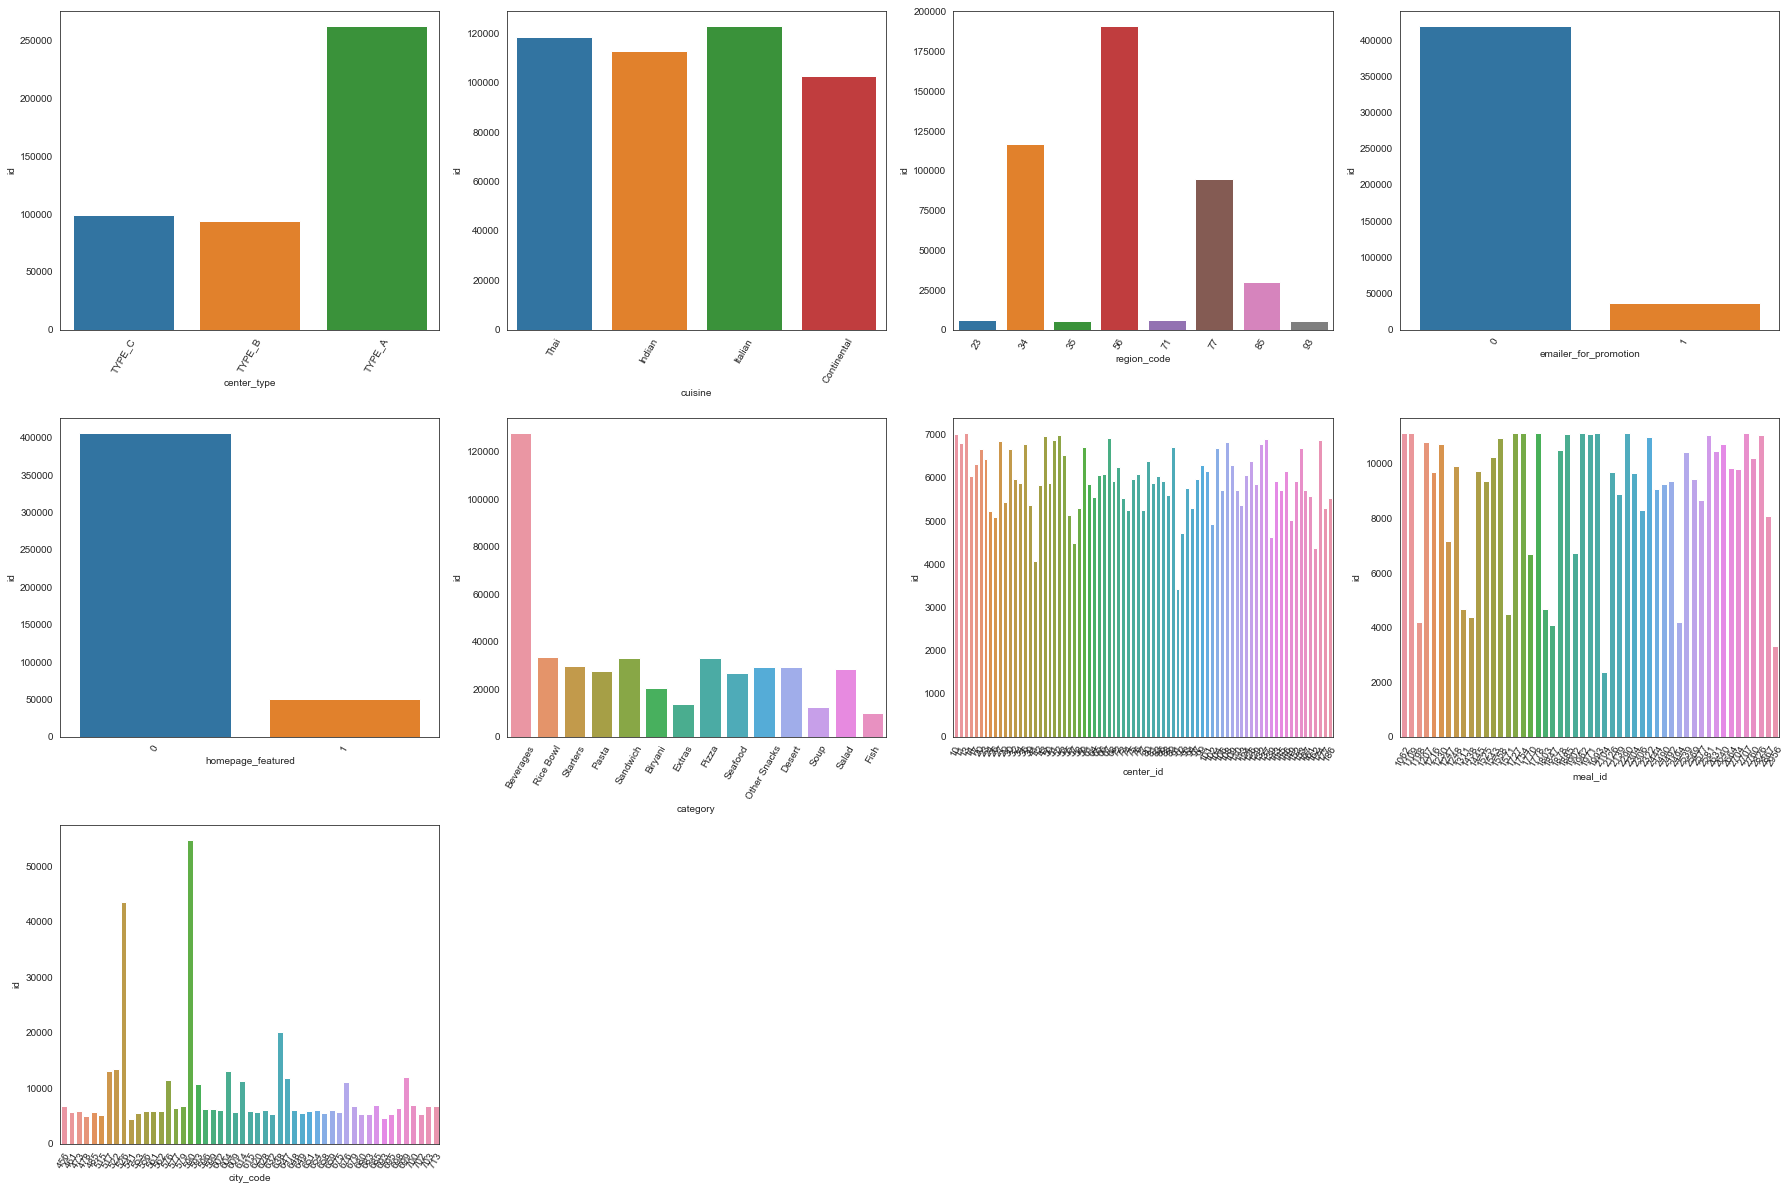

In [27]:
print (cols_all_cat)
sns.set_style("white")
plt.figure(figsize=(25,50))
i=1
while i<=len(cols_all_cat):
    plt.subplot(len(cols_all_cat),4,i)
    sns.barplot(y="id", x=cols_all_cat[i-1], data=df_demand_all, ci=0, estimator=len)
    
    plt.xticks(rotation=60)
    i+=1
plt.tight_layout()

<font color=red size=5> Oridinal Variable Data Imbalance</font>

In [ ]:
print (cols_all_ord)
sns.set_style("white")
plt.figure(figsize=(20,50))
i=1
while i<=len(cols_all_ord):
    plt.subplot(len(cols_all_ord,4,i)
    sns.barplot(y="Id", x=cols_all_ord[i-1], data=df_house, ci=0, estimator=len)
    i+=1
plt.tight_layout()

<font color=red size=5> Numerical Variable Data Distribution</font>

In [ ]:
print (cols_num)
sns.set_style("white")
plt.figure(figsize=(20,20))
i=1
while i<=len(cols_num):
    plt.subplot(len(cols_num),3,i)
    sns.boxplot( x=df_demand_all[ cols_all_num[i-1] ])
    i+=1
plt.tight_layout()
plt.show()

<font color=red size=6>Imputing Null Values</font>

<font color=red size=5> Convert categorical variables into number</font>

We need to convert values in categorical variables in number for following reasons.
1. So that we can check relation between categorical variable and sales price. 
- So that we can do null value imputation using KNN. 
- So that we can do the modeling 

In [111]:
#If categorical variable has null value then it will assign 0 for that
#This function will return a categorical column with numeric values 
all_fldmap = pd.DataFrame()
 
def getValuesForCat(df, fld, hasNull=True, Print=True, fldmap_required=False):
    lst = list(df[fld].unique())

    if hasNull:
        lst.remove(np.nan)
        lst.insert(0,np.nan)
    if Print:
        print ("Field Name:" , fld)
        print ("Original=>",lst)
        print ("Numeric=>",np.array(range(len(lst))), "\n")

    if fldmap_required:
        fmap = pd.DataFrame( list( zip([fld]*len(lst),lst, np.array(range(len(lst))) ) ) )
        fmap.columns = ['Fname','Original','Numeric']
        
        global all_fldmap
        
        all_fldmap = pd.concat([all_fldmap,fmap])
        
    return df[fld].apply(lambda x: lst.index(x))
    

In [112]:
#Replace categorical field with number (This shall be done only for those columns which does not have any null value)
i=0
while i< len(cols_with_NonNullVal_cat):
    colname = cols_with_NonNullVal_cat[i]
    df_demand_all[colname]  = getValuesForCat(df=df_demand_all, fld=colname,hasNull=False, Print=True,fldmap_required=True)
    i+=1 
print ("Processing Done")
#print (cols_with_NonNullVal_cat)

Field Name: region_code
Original=> [56, 85, 77, 34, 35, 71, 93, 23]
Numeric=> [0 1 2 3 4 5 6 7] 

Field Name: center_id
Original=> [55, 24, 11, 83, 32, 13, 109, 52, 93, 186, 146, 57, 149, 89, 124, 152, 97, 74, 108, 99, 66, 94, 91, 20, 34, 137, 92, 126, 36, 162, 75, 177, 27, 157, 106, 64, 129, 14, 17, 153, 139, 161, 81, 26, 73, 50, 104, 42, 113, 145, 53, 72, 67, 174, 29, 77, 41, 30, 76, 59, 88, 143, 58, 10, 101, 80, 43, 65, 39, 102, 110, 132, 23, 86, 68, 51, 61]
Numeric=> [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76] 

Field Name: cuisine
Original=> ['Thai', 'Indian', 'Italian', 'Continental']
Numeric=> [0 1 2 3] 

Field Name: category
Original=> ['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich', 'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert', 'Soup', 'Salad', 'Fish']
Nume

In [113]:
#Impute Null Categorical Values
def imputeNull_CatValues(df,fld,fldmap_required=False):
    # Get hotencoded categories for a given field, create a new field in main dataframe and assign this to that field    
    df[fld] = getValuesForCat(df=df_with_null, fld=fld, hasNull=True, Print=True, fldmap_required=fldmap_required)

    #create train dataset from main dataframe, it includes only non null rows of the given field
    #(in hotencoding process null is converted to 0)
    col =cols.copy()
    
    #create test dataset from main dataframe, it includes all the rows.
    X_test = df[col]
    
    col.append(fld)    
    df_train = df[col] [ df[fld]!=0]  

    #supplied fld in dataframe need to be classified. So we need to train using this field
    y_train= df_train[fld]
    X_train = df_train.drop(columns=fld)

    #Training the model on the train data
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(max_iter=150)

    lm = lr.fit(X_train,y_train)

    #predict using train data
    pred_train_clusterid = lm.predict(X_train)

    #predict using test data
    pred_test_clusterid = lm.predict(X_test)

    print ("Accuracy on Train Dataset :",
    round(metrics.accuracy_score(y_train, pred_train_clusterid),2))
    print ("==========================================")
    
    df1 = pd.DataFrame( {"prediction":pred_test_clusterid, "actual":df[fld]})
    
    #create a need field in temp dataframe df1, 
    #for a given field if actual==0 (it has null value) then use prediction to replace
    df1.loc[ df1["actual"]==0,fld] = df1["prediction"]
    
    #If actual is not null then we should not use predicted cluster value, so use actual value
    df1.loc[ df1["actual"]!=0,fld] = df1["actual"]
    
    #ensure filed is integer
    df1[fld] = df1[fld].apply(int)
    
    #replace this column from temp df1 to main dataframe df
    df[fld] = df1[fld]
    
    #With this all null values for given field in the dataframe has been replace with the predicted value
    
    return

In [31]:
all_fldmap.shape

(212, 3)

In [32]:
## List of All Non Null columns which can be used to create cluster and then Null Value Imputation
cols = cols_with_NonNullVal_cat + cols_with_NonNullVal_num

## This steps impute null values only in Categorical Fields
df_with_null = df_demand_all[cols_with_NullVal_cat]
for colname in cols_with_NullVal_cat:
    imputeNull_CatValues(df_house,colname,fldmap_required=True)

In [33]:
all_fldmap.shape

(212, 3)

In [34]:
#Impute Numeric Values
print ("Imputing Numeric Cols of Null Values with Mean")

for colname in cols_with_NullVal_num:
    val = round(df_house[colname].mean(),1)
    print (colname, " imputed with ", val)
    df_house[colname] [ df_house[colname].isna() ]  = val

Imputing Numeric Cols of Null Values with Mean


In [35]:
#Impute Numeric Values
print ("Imputing Numeric (Ordinal Value) Cols with Null Values with Median")

for colname in cols_with_NullVal_ord:
    val= df_house[colname].median()
    print (colname, " imputed with ", val)
    df_house[colname] [ df_house[colname].isna() ]  = val

Imputing Numeric (Ordinal Value) Cols with Null Values with Median


In [36]:
#Check Null Values
(df_demand_all.isnull().sum()/len(df_demand_all)*100).sort_values()[::-1].head(10)

cuisine                  0.0
category                 0.0
op_area                  0.0
center_type              0.0
region_code              0.0
city_code                0.0
num_orders               0.0
homepage_featured        0.0
emailer_for_promotion    0.0
base_price               0.0
dtype: float64

<font color=red size=6> Feature Engineering</font>

In [189]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

def plotpolynomical(x, y):

    #x = df_fd.base_price #np.linspace(0, 10, 100)
    #y = df_fd.num_orders

    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.scatterplot(x,y)


    X = x[:, np.newaxis]
    X_plot = x_plot[:, np.newaxis]

    plt.subplot(1,2,2)
    colors = ['red','blue','teal', 'yellowgreen', 'gold']
    lw = 2
    plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
             label="ground truth")
    #plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

    for count, degree in enumerate([1,2,3, 4,5]):
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X, y)
        y_plot = model.predict(X_plot)
        plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
                 label="degree %d" % degree)

    plt.legend(loc='upper right')

    plt.show()

In [186]:
df_demand_all.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,0,0,136.83,152.29,0,0,177,0,0,0,2.0,0,0
1,1466964,1,0,1,136.83,135.83,0,0,270,0,0,0,2.0,0,0
2,1346989,1,0,2,134.86,135.86,0,0,189,0,0,0,2.0,0,0
3,1338232,1,0,3,339.50,437.53,0,0,54,0,0,0,2.0,0,1
4,1448490,1,0,4,243.50,242.50,0,0,40,0,0,0,2.0,0,1


In [187]:
cols = df_demand_all.columns

In [191]:
cols[2]

'center_id'

ValueError: Found array with dim 3. Estimator expected <= 2.

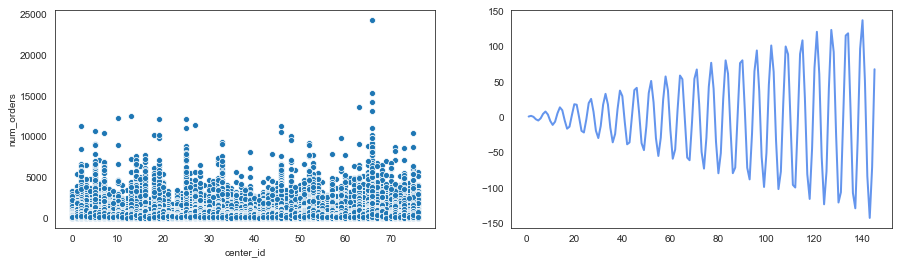

In [193]:
plotpolynomical(df_demand_all[cols[2]], df_demand_all.num_orders )

<font color=red size=6> Visualising Relationship between y & X</font>

<font color=red size=5>Check SalesPrice & Cateorical Variable Relationship</font>

['center_type', 'cuisine', 'region_code', 'emailer_for_promotion', 'homepage_featured', 'category', 'center_id', 'meal_id', 'city_code']


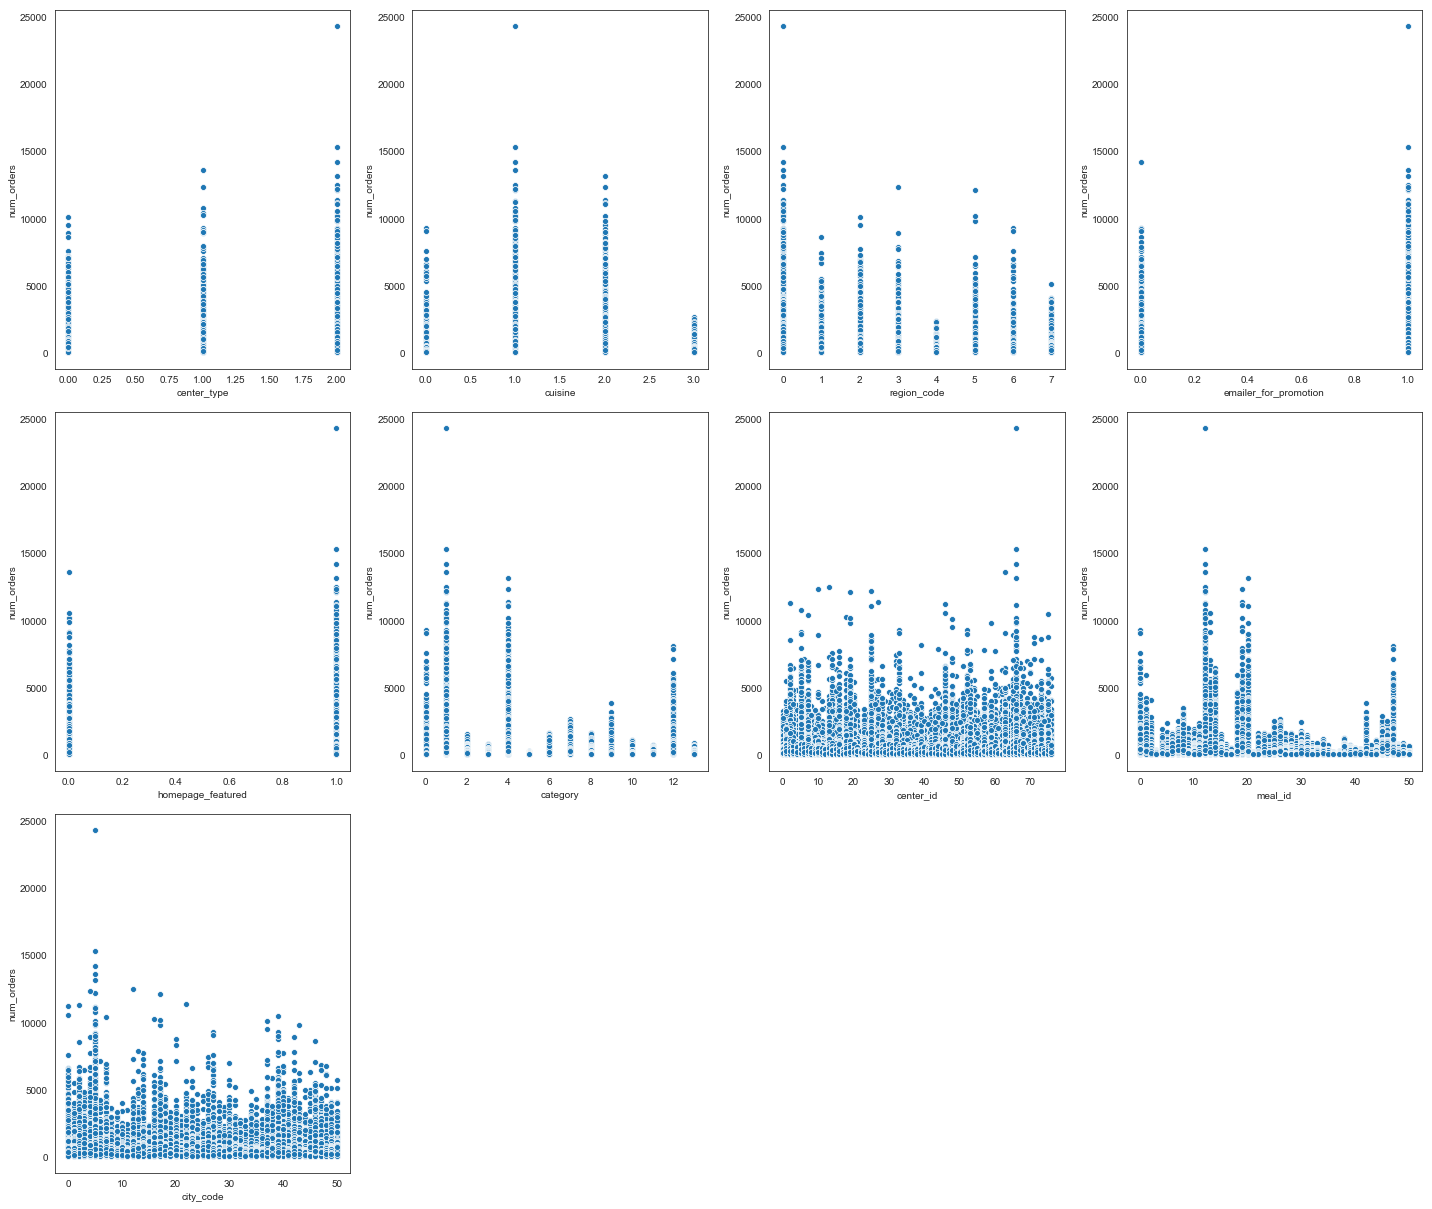

In [37]:
print (cols_all_cat)
sns.set_style("white")
plt.figure(figsize=(20,50))
i=1
while i<=len(cols_all_cat):
    plt.subplot(len(cols_all_cat),4,i)
    sns.scatterplot(y=df_demand_all.num_orders, x=cols_all_cat[i-1], data=df_demand_all)
    i+=1
plt.tight_layout()

<font color=red size=5>Check SalesPrice & Ordinal Variable Relationship</font>

In [38]:
print (cols_all_ord)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_ord):
    plt.subplot(40,6,i)
    sns.scatterplot(y=df_demand_all.SalePrice, x=cols_all_ord[i-1], data=df_demand_all)
    i+=1
plt.tight_layout()

[]


<Figure size 1440x7200 with 0 Axes>

<font color=red size=5> Check SalesPrice & Numeric Variable Relationship</font>

In [130]:
df_demand_all[ 'num_orders' ].head()

0    177
1    270
2    189
3     54
4     40
Name: num_orders, dtype: int64

In [165]:
y.head(5)

0    177
1    270
2    189
3     54
4     40
Name: num_orders, dtype: int64

In [181]:
y = df_demand_all.num_orders
X = df_demand_all.drop("num_orders",axis=1)
X.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [183]:
print (X.shape,y.shape)

(456548, 14) (456548,)


In [174]:
print ( df_demand_all[ 'week' ].shape, y1.shape)
print ( type(df_demand_all[ 'week' ]), type (y1.shape))

NameError: name 'y1' is not defined

In [176]:
print ( X.shape, y.shape)
print ( type(X), type (y.shape))

(456548,) (456548,)
<class 'pandas.core.series.Series'> <class 'tuple'>


In [177]:
X.head()

0    1
1    1
2    1
3    1
4    1
Name: week, dtype: int64

In [171]:
degree=2
X = df_demand_all[ 'week' ]
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X,y)
y1 = model.predict(X)
#y1 = pd.Series(y1)

#model.fit(X, y)

sns.scatterplot(x= X, y= y1)

ValueError: Expected 2D array, got 1D array instead:
array=[  1   1   1 ... 145 145 145].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: Expected 2D array, got 1D array instead:
array=[  1   1   1 ... 145 145 145].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

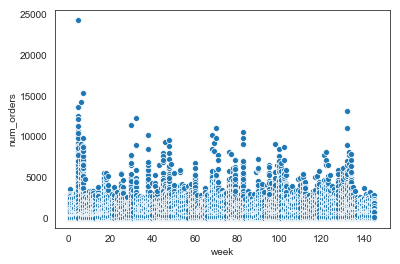

In [159]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
colors = ['red','blue','teal', 'yellowgreen', 'gold']
lw=2

X = df_demand_all[ 'week' ] #.reshape(-1,1)
y = df_demand_all['num_orders'] #.reshape(-1,1)

sns.scatterplot(x=X, y=y)
    
#X_plot = X
for count, degree in enumerate([1,2,3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Lasso())
    model.fit(X, y)
    y1 = model.predict(X)
    sns.scatterplot(x= X, y= y1) #, size=lw)
    #plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
    #         label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()


['num_orders', 'week', 'checkout_price', 'base_price', 'op_area', 'id']


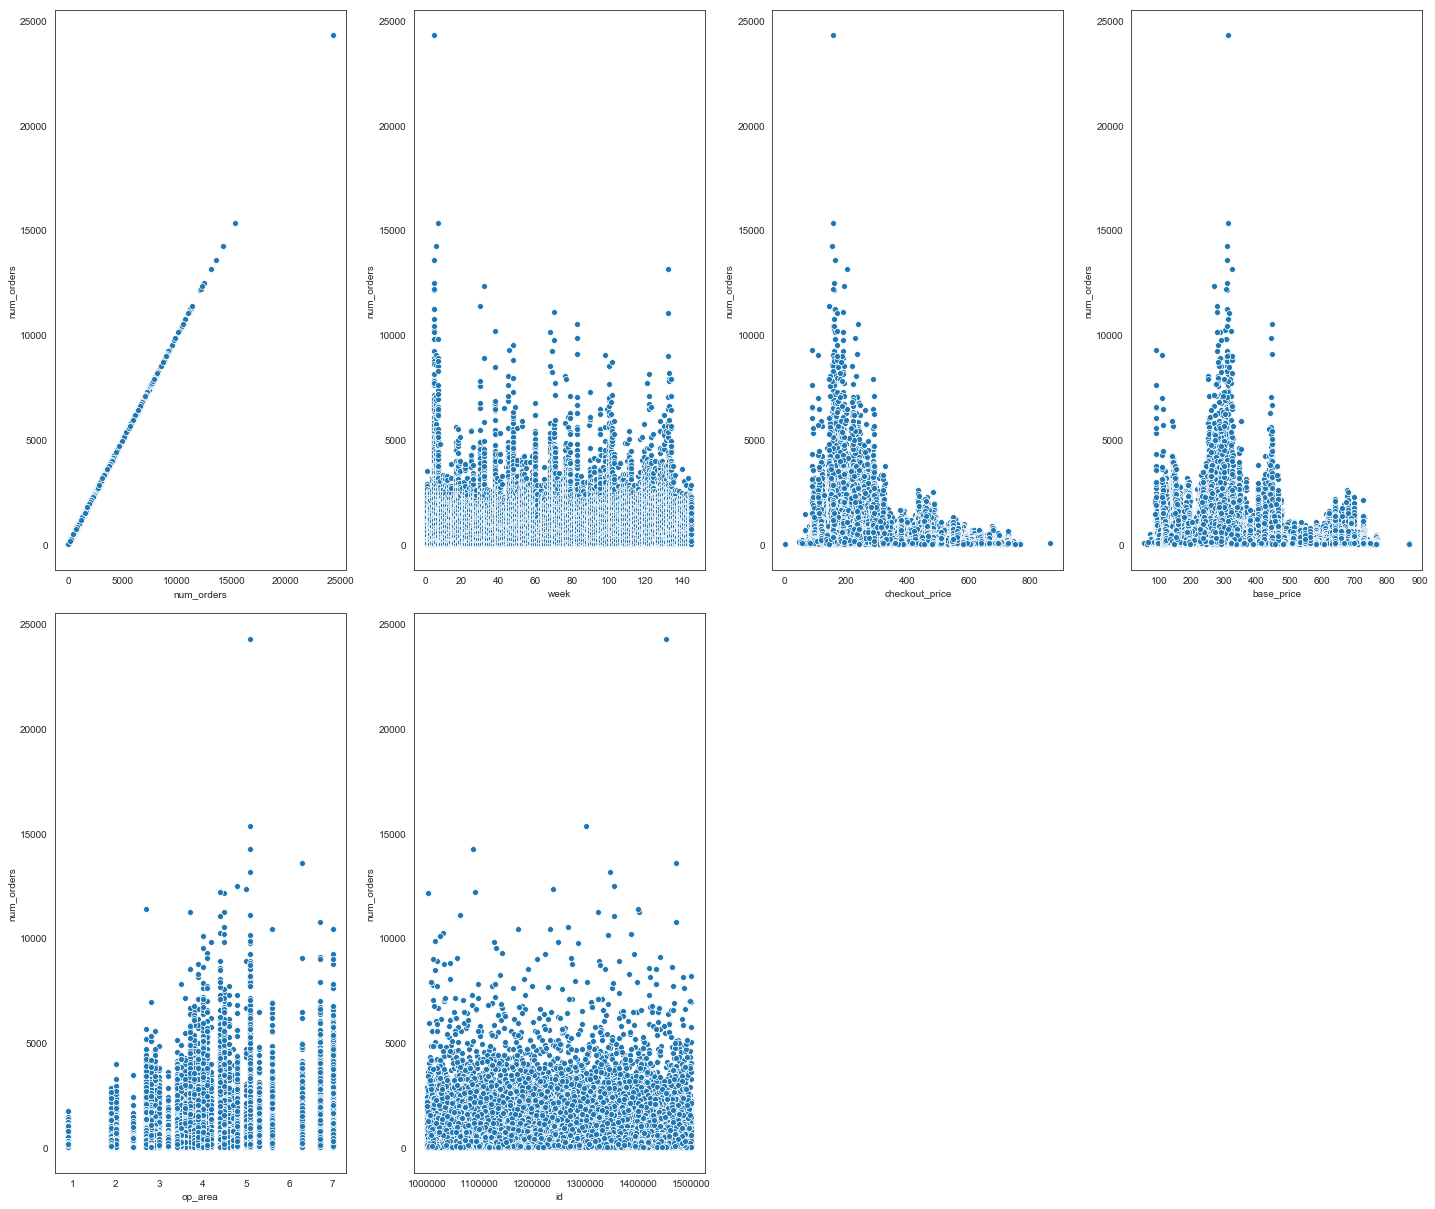

In [39]:
print (cols_num)
sns.set_style("white")
plt.figure(figsize=(20,50))
i=1
while i<=len(cols_num):
    plt.subplot(len(cols_num),4,i)
    sns.scatterplot(y=df_demand_all.num_orders, x=cols_num[i-1], data=df_demand_all)
    i+=1
plt.tight_layout()

#All fields looks have liner relationship. So no transformation is required for any field.

<font color=red size=5> Outlier Treatment</font>

In [ ]:
#df_demand_all['order_bin'] = pd.cut(df_demand_all.num_orders,[0,1000,2000,4000,8000,12000,16000,20000,25000],labels=[1,2,3,4,5,6,7,8])
#df_demand_all.head(5)

In [40]:
q1=np.quantile(df_demand_all.num_orders,.25)
q2=np.quantile(df_demand_all.num_orders,.25)
q3=np.quantile(df_demand_all.num_orders,.75)
outlier = (q3-q1)*4
outlier

1080.0

In [41]:
len(df_demand_all [ df_demand_all.num_orders>outlier]) /len(df_demand_all)
#As per the original definition 19% data is outlier
#As per the redefined outlier range 4 times of quartiles range. 3% data will be removed.

0.03229671359857014

In [42]:
df_demand_all = df_demand_all [ df_demand_all.num_orders<=outlier]

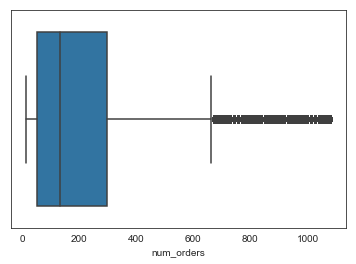

In [43]:
sns.boxplot(df_demand_all.num_orders)

<font color=red size=5> Check Degree of Correlation between SalesPrice & Numeric Variable</font>

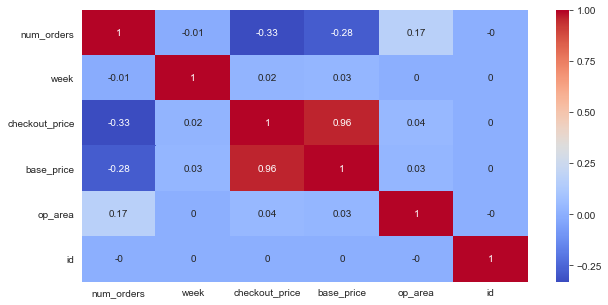

In [47]:
df_corr = np.round(df_demand_all[cols_num].corr(),2)
sns.set_style("white")
plt.figure(figsize=(10,5))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()

In [48]:
df_corr

,num_orders,week,checkout_price,base_price,op_area,id
num_orders,1.00,-0.01,-0.33,-0.28,0.17,-0.0
week,-0.01,1.00,0.02,0.03,0.00,0.0
checkout_price,-0.33,0.02,1.00,0.96,0.04,0.0
base_price,-0.28,0.03,0.96,1.00,0.03,0.0
op_area,0.17,0.00,0.04,0.03,1.00,-0.0
id,-0.00,0.00,0.00,0.00,-0.00,1.0


<font color=red size=5> Create Dummy Fields, Split Dataset & Scale Numeric Fields</font>

In [49]:
df_demand_all.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,0,0,136.83,152.29,0,0,177,0,0,0,2.0,0,0
1,1466964,1,0,1,136.83,135.83,0,0,270,0,0,0,2.0,0,0
2,1346989,1,0,2,134.86,135.86,0,0,189,0,0,0,2.0,0,0
3,1338232,1,0,3,339.50,437.53,0,0,54,0,0,0,2.0,0,1
4,1448490,1,0,4,243.50,242.50,0,0,40,0,0,0,2.0,0,1


In [50]:
#Create dummy fields for all cateorical variables
for colname in cols_all_cat:
    temp = pd.get_dummies( df_demand_all[colname], prefix=colname, drop_first=True)
    df_demand_all.drop(columns=colname, inplace=True)
    df_demand_all = pd.concat([df_demand_all, temp], axis=1)

In [51]:
#Split Dataset in X & y
Xcols = list(df_demand_all.columns)
Xcols.remove("num_orders")

X = df_demand_all[Xcols]
y= df_demand_all.num_orders

In [52]:
# split X, y into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
X_train_id = X_train.id
X_test_id = X_test.id

X_train = X_train.drop(columns="id")
X_test  = X_test.drop(columns="id")

In [53]:
# scaling the numeric feature features in train and test
from sklearn.preprocessing import StandardScaler

cols_scale = cols_num.copy()

cols_scale.remove("id")
cols_scale.remove("num_orders")

sc = StandardScaler()
X_train[cols_scale] =pd.DataFrame( sc.fit_transform( X_train[cols_scale] ), index=X_train.index )
X_test[cols_scale]  =pd.DataFrame( sc.transform( X_test[cols_scale] ) , index=X_test.index)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [71]:
X_train.head()
df_demand_all.num_orders.unique()

array([ 177,  270,  189,   54,   40,   28,  190,  391,  472,  676,  823,
        972,  162,  420,  756,  108,  188,  485,  798,   14,  176,  150,
        312,  231,   13,   15,   55,   67,   81,  377,  514,  256,  243,
        324,  998,  702,  877,  134,  285,   95,   82,   42,  744,  393,
        554,   27,  148,  364,  109,   96,  215,  419,  634,  122,  487,
        107,  203,  959, 1052,  379,   80,  620,  446,  513,  703,  879,
        202,  271,   68,  258,  458,  729,  528,   41,  783,  769,  459,
        540,  460,   26, 1025,  284,  473,  310,  406,  553,   69,  244,
        311,  163,  635,  701,  121,   53,  149,   94,  175,  445,  568,
        161,  204,  135,  770,  216,  405,  499,  527,  269,  474,  123,
        366,  337, 1067,  526,  257,  836,  541,  688,  904,  944,  283,
        486,  986,  593,  890,  958,  757,  782,  433,  404,  378,  217,
        690,  500,  715,  392,  662,  296, 1012,  636,  580,  136,  242,
        297,  418,  298,  663,  851,  717,  852,  7

In [64]:
X_train.columns

Index(['week', 'checkout_price', 'base_price', 'op_area', 'center_type_1',
       'center_type_2', 'cuisine_1', 'cuisine_2', 'cuisine_3', 'region_code_1',
       ...
       'city_code_41', 'city_code_42', 'city_code_43', 'city_code_44',
       'city_code_45', 'city_code_46', 'city_code_47', 'city_code_48',
       'city_code_49', 'city_code_50'],
      dtype='object', length=207)

<font color=red size=5>__Start Modeling__</font>

<font color=red size=4>Lasso Regression</font>

In [56]:
# list of alphas to tune
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
# 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

params = {'alpha': [1.0, 3.0, 5.0, 10.0, 20, 50, 100, 500]}

#folds = 5
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#Model
lasso = Lasso(max_iter=2000)

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=2000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1.0, 3.0, 5.0, 10.0, 20, 50, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [57]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.345773,0.177501,0.127195,0.017539,1,{'alpha': 1.0},-104.077706,-103.698031,-104.254552,-103.864088,...,-104.015971,0.206698,1,-103.947764,-104.042647,-103.929490,-104.100377,-103.963999,-103.996855,0.064562
1,2.066676,0.126270,0.108710,0.007383,3,{'alpha': 3.0},-111.476087,-111.414782,-111.782140,-111.363876,...,-111.503380,0.145814,2,-111.460834,-111.542767,-111.402303,-111.594259,-111.482899,-111.496612,0.066374
2,1.816545,0.008191,0.106317,0.000797,5,{'alpha': 5.0},-119.721507,-119.902558,-120.189291,-119.904772,...,-119.888092,0.171133,3,-119.839517,-119.917489,-119.754085,-119.996069,-119.907054,-119.882843,0.081317
3,1.670535,0.079158,0.107315,0.005302,10,{'alpha': 10.0},-139.664705,-140.362776,-140.154999,-140.373935,...,-140.088148,0.276554,4,-140.110258,-140.122377,-139.926951,-140.171136,-140.088267,-140.083798,0.082991
4,1.484033,0.007108,0.103922,0.001716,20,{'alpha': 20},-152.152233,-152.883680,-152.503974,-152.771002,...,-152.487007,0.310494,5,-152.634733,-152.359411,-152.419690,-152.420842,-152.590887,-152.485113,0.107505


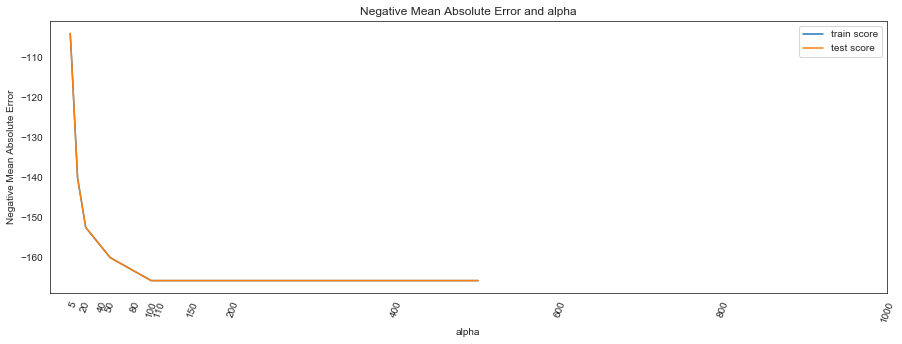

In [58]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'] #.astype('float32')

# plotting
plt.figure(figsize=(15,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xticks([5,20,40,50,80,100,110,150,200,400,600,800,1000])
plt.xticks(rotation=70)
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [59]:
cv_results[ ['param_alpha','mean_test_score','mean_train_score'] ]

,param_alpha,mean_test_score,mean_train_score
0,1,-104.015971,-103.996855
1,3,-111.503380,-111.496612
2,5,-119.888092,-119.882843
3,10,-140.088148,-140.083798
4,20,-152.487007,-152.485113
5,50,-160.025245,-160.024587
6,100,-165.753664,-165.752969
7,500,-165.753664,-165.752969


In [60]:
alpha =100
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
df_demand_all.head()

,id,week,checkout_price,base_price,num_orders,op_area,center_type_1,center_type_2,cuisine_1,cuisine_2,...,city_code_41,city_code_42,city_code_43,city_code_44,city_code_45,city_code_46,city_code_47,city_code_48,city_code_49,city_code_50
0,1379560,1,136.83,152.29,177,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1466964,1,136.83,135.83,270,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1346989,1,134.86,135.86,189,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1338232,1,339.50,437.53,54,2.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1448490,1,243.50,242.50,40,2.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<font color=red size=3>__Lasso Regression R Squre Score__</font>

In [61]:
y_test_predict_lasso = round(pd.Series(lasso.predict(X_test), index=X_test.index),0)
metrics.r2_score(y_test, y_test_predict_lasso)

-1.6960134544108385e-05

<font size=4 color=red>__Columns selected by Lasso__</font>

In [ ]:
coef_lasso = pd.DataFrame(lasso.coef_, index = X_train.columns).reset_index()
coef_lasso.columns = ["Feature","coef"]
#coef_lasso

In [ ]:
cols_selected = coef_lasso[ coef_lasso.coef!=0]['Feature']

In [75]:
#cols_selected = coef_lasso[ coef_lasso.coef!=0]['Feature']
X_train_new = X_train.copy()#[cols_selected]
print ("Total # of Columns in dataset", len(df_demand_all.columns))
#print ("Columns Selected by Lasso ", len(cols_selected))

Total # of Columns in dataset 209


<font size=4 color=red>__Rebuild the Model Using Lasso, RFE and VIF__</font>

<font size=3 color=red>__Check Multi Colinearity__</font>

In [76]:
#This function will give VIF for df supplied as param

def getVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [77]:
#This function builds model, prints error summary, return features selected by RFE and prints summary of regression
#This all is done depends what parameter is passed to this function

#Parameters of this function
#X_Data it may be X_train or X_Test.
#number_of_rfe_features means how many features you want RFE to select for you
#predict=True mean return the model and print error terms graph. 
#predict=False means return the columns selected by RFE &  model. It also print the linearRegression summary
#train=True mean fit the model. train=False mean donot fit the model. 
#when Train= true then X_Data should be X_train dataframe
#DisplayTable = True means Print the summary of regression

def buildModel(X_data, y_data, number_of_rfe_features, predict=False, train=True, rsquare_train=False,
              DisplayTable=False):

    if train:
        #Initiate LinearRegression Model Object
        lm = LinearRegression()

        #Fit Model on Train Data
        lm.fit(X_data, y_data)

        #Identify top n features from the dataframe
        rfe = RFE(lm, number_of_rfe_features)             
        rfe = rfe.fit(X_data, y_data)

        #Name of those top n features
        col = X_data.columns[rfe.support_]

        # Creating X_train dataframe with RFE selected variables
        X_train_rfe = X_data[col]

        # Adding a constant variable, because statsmodel.ols 
        #does not have intercept by default and line go through 0,0
        X_train_rfe = sm.add_constant(X_train_rfe)
        
        # Running the linear model
        lm = sm.OLS(y_data,X_train_rfe).fit()
        
        if rsquare_train:
            return r2_score(y_data,lm.predict(X_train_rfe))

    if predict:
        fig = plt.figure(figsize=(15,5))
        
        # Plot heading 
        fig.suptitle('Error Terms', fontsize = 20)  
        plt.subplot(1,2,1)
        #predict the price
        y_train_predict = lm.predict(X_train_rfe)
        
        # Plot the histogram of the error terms
        sns.distplot((y_data - y_train_predict), bins = 20)
        
        # X-label
        plt.xlabel('Errors', fontsize = 18)
        
        # Plot the scattered of the error terms
        plt.subplot(1,2,2)
        sns.scatterplot(y=(y_data - y_train_predict), x=y_train_predict)
        # X-label
        plt.ylabel('Errors', fontsize = 18)
        plt.xlabel("y prediction", fontsize = 18)
        return lm
        
    else:
        #Let's see the summary of our linear model
        if DisplayTable:
            print(lm.summary())
        else:
            pkey= list(lm.pvalues.sort_values().tail(1).index)[0]
            pval = lm.pvalues.sort_values().tail(1)[0]
            print ("Adj. R2 Score:" , round(lm.rsquared_adj,2), "| max p value: ",pkey, round(pval,4) )
        return col, lm

In [78]:
#During model building This function helps in identifying column which should be dropped based on VIF or p-value

#If drop_basedOn_pvalue is True then it will give name of feature which has highest p value
#else it will give name of feature which has higest VIF

def getfeatureName_toDrop(drop_basedOn_pvalue=True):
    if drop_basedOn_pvalue:
        nm=list(lm.pvalues.sort_values(ascending=False).head(1).index)[0]
        if nm=="const":
            nm=list(lm.pvalues.sort_values(ascending=False).head(2).index)[1]
        return nm
    else:
        return list(vif.Features.head(1))[0]

In [83]:
#Build the model. All feature Selected First Time
n=len(X_train_new.columns)
n=100
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,
                  rsquare_train=False, DisplayTable=True)

                            OLS Regression Results                            
Dep. Variable:             num_orders   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     1523.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:11:39   Log-Likelihood:            -2.0588e+06
No. Observations:              309262   AIC:                         4.118e+06
Df Residuals:                  309195   BIC:                         4.118e+06
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           201.0274      0.686    292.898

In [82]:
#Check VIF of these columns
vif=getVIF(X_train_new)
vif.head(5)

#Even if Lasso has selected 81 columns out of 234. We have Multicolinearity problem. 
#We need to remove this Multicolinearity.

KeyboardInterrupt: 

In [ ]:
dropped_Feature_list=[]
dropFeature = getfeatureName_toDrop(drop_basedOn_pvalue=False)
dropped_Feature_list.append(dropFeature)

print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)

#Build the model with one less feature than last time
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,
                 rsquare_train=False, DisplayTable=False)  

In [ ]:
#Check VIF of these columns
vif=getVIF(X_train_new)
vif.head(5)

In [ ]:
dropFeature = getfeatureName_toDrop(drop_basedOn_pvalue=False)
dropped_Feature_list.append(dropFeature)

print ("Dropping Feature:" +dropFeature)
X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
n-=1

#Build the model with one less feature than last time
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,
                 rsquare_train=False, DisplayTable=False)  

In [ ]:
#Check VIF of these columns
vif=getVIF(X_train_new)
vif.head(5)

In [ ]:
dropFeature = getfeatureName_toDrop(drop_basedOn_pvalue=False)
print ("Dropping Feature:" +dropFeature)
dropped_Feature_list.append(dropFeature)

X_train_new.drop(columns=dropFeature, inplace=True, axis=0)

#Build the model with one less feature than last time
n-=1
col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,
                 rsquare_train=False, DisplayTable=False)  

In [ ]:
#Check VIF of these columns
vif=getVIF(X_train_new)
vif.head(5)

In [ ]:
#I have done this exercise manually. But looping it here for code cleaning
#At this stage Adj R2 Score is .93.
#I am setting min Adj R2 Score and telling this function 
#to remove all feature one at a time till Adj R2 Score come to above set limit

Min_Adj_R2_Value_Tolerance = .92
adjr2= lm.rsquared_adj

while adjr2 > Min_Adj_R2_Value_Tolerance:
    
    dropFeature = getfeatureName_toDrop(True)
    dropped_Feature_list.append(dropFeature)
    
    print ("Dropping Feature:" +dropFeature)
    X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
    
    #Build the model with one less feature than last time
    n-=1
    col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,
                 rsquare_train=False, DisplayTable=False)  
    adjr2= lm.rsquared_adj

In [ ]:
#drop in adjusted r2 score = .01
print ("Number of remaining features: ", len (X_train_new.columns))
#50 Features which were selected by Lasso has been be removed by above steps 
#and drop of Adj r2 is significantly small

In [ ]:
#Check VIF of remaining columns
vif=getVIF(X_train_new)
vif.head(5)
#Still VIF is high

In [ ]:
#Now let us remove those features which has high VIF.
#Max VIF at this stage is 22.59
#Accepted VIF is <5
#Steps below will remove some more feature till agreed VIF is achieved. We will remove one feature at a time.
#At the same time we are checking max p value of the remaining feature in the model

In [ ]:
vif_val = list(vif.VIF.head(1))[0]
while vif_val>=5:
    dropFeature = getfeatureName_toDrop(False)
    print ("Dropping Feature:" +dropFeature)
    dropped_Feature_list.append(dropFeature)
    
    X_train_new.drop(columns=dropFeature, inplace=True, axis=0)
    n-=1
    col,lm=buildModel(X_train_new, y_train, number_of_rfe_features=n,predict=False,train=True,
                 rsquare_train=False, DisplayTable=False)
    vif=getVIF(X_train_new)
    vif_val = list(vif.VIF.head(1))[0]

In [ ]:
#Check VIF of remaining columns
vif=getVIF(X_train_new)
vif.head(5)

In [ ]:
#VIF is fairly good at this stage. 4 more features has been dropped
print ("Number of remaining features: ", len (X_train_new.columns))

<font size=4 color=red>__After Removing Multi-colinearity Refit the Model using Lasso Algorithms__</font>

In [ ]:
alpha =180
lasso_vif = Lasso(alpha=alpha)      
lasso_vif.fit(X_train_new, y_train)

<font size=4 color=red>__R Square Score after Refitting__</font>

In [ ]:
y_test_predict_lasso_vif = round(pd.Series(lasso_vif.predict(X_test[X_train_new.columns]), index=X_test.index),0)
metrics.r2_score(y_test, y_test_predict_lasso_vif)
#There is a drop in r2 score. But I will that is fine because there is least multicolinearity in the dataset
#which is used for training. Therefore this model will work much better on the unseen dataset.

In [ ]:
print ("Columns Selected by Lasso & RFE ", len(X_train_new.columns))

<font size=4 color=red>__Check Precition Errors__</font>

In [ ]:
fig = plt.figure(figsize=(15,5))
        
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
plt.subplot(1,2,1)
#predict the price


# Plot the histogram of the error terms
sns.distplot((y_test - y_test_predict_lasso_vif), bins = 20)

# X-label
plt.xlabel('Errors', fontsize = 18)

# Plot the scattered of the error terms
plt.subplot(1,2,2)
sns.scatterplot(y=(y_test - y_test_predict_lasso_vif), x=y_test_predict_lasso_vif)
# X-label
plt.ylabel('Errors', fontsize = 18)
plt.xlabel("y prediction - Lasso, RFE VIF", fontsize = 18)

<font color=red size=4> Ridge Regression</font>

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#folds = 5
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#Model
ridge = Ridge()

# cross validation
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

#neg_mean_absolute_error

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'] #.astype('int32')

# plotting
plt.figure(figsize=(15,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xticks([5,10,20,30,40,50,100,150,200,400,600,800,1000])
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
cv_results[ ['param_alpha','mean_test_score','mean_train_score'] ]

In [ ]:
#Optimize the model
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

<font color=red size=3>__Ridge Regression R Squre Score__</font>

In [ ]:
y_test_predict_ridge = round(pd.Series(ridge.predict(X_test), index=X_test.index),0)
metrics.r2_score(y_test,y_test_predict_ridge)

In [ ]:
fig = plt.figure(figsize=(15,5))
        
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
plt.subplot(1,2,1)
#predict the price


# Plot the histogram of the error terms
sns.distplot((y_test - y_test_predict_ridge), bins = 20)

# X-label
plt.xlabel('Errors', fontsize = 18)

# Plot the scattered of the error terms
plt.subplot(1,2,2)
sns.scatterplot(y=(y_test - y_test_predict_ridge), x=y_test_predict_ridge)
# X-label
plt.ylabel('Errors', fontsize = 18)
plt.xlabel("y prediction- Ridge", fontsize = 18)

<font size=3 color=red>__Elastic Regression__</font>

In [ ]:
enet = ElasticNet(max_iter=50000)
#enet.fit(X_train, y_train)

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#folds = 5
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

#Model
enet = ElasticNet(max_iter=30000)

# cross validation
model_cv = GridSearchCV(estimator = enet, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

In [ ]:
# plotting
plt.figure(figsize=(15,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.xticks([5,20,40,50,80,100,150,200,400,600,800,1000])
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
alpha =.01

enet = ElasticNet(alpha=alpha)
        
enet.fit(X_train, y_train)

<font color=red size=3>__ElasticNet Regression R Squre Score__</font>

In [ ]:
#predict the price
y_test_predict_enet = round(pd.Series(enet.predict(X_test), index=X_test.index),0)
metrics.r2_score(y_test, y_test_predict_enet)

In [ ]:
fig = plt.figure(figsize=(15,5))
        
# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  
plt.subplot(1,2,1)


# Plot the histogram of the error terms
sns.distplot((y_test - y_test_predict_enet), bins = 20)

# X-label
plt.xlabel('Errors', fontsize = 18)

# Plot the scattered of the error terms
plt.subplot(1,2,2)
sns.scatterplot(y=(y_test - y_test_predict_enet), x=y_test_predict_enet)
# X-label
plt.ylabel('Errors', fontsize = 18)
plt.xlabel("y prediction", fontsize = 18)

<font size=4 color=red>__Prepareing a Final List of Feature For Management__</font>

In [ ]:
#get the coeffient and features from each model
coef_lasso = pd.Series(lasso.coef_, index = X_train.columns)
coef_lasso_vif = pd.Series(lasso_vif.coef_, index = X_train_new.columns)
coef_ridge = pd.Series(ridge.coef_, index = X_train.columns)
coef_enet = pd.Series(enet.coef_, index = X_train.columns)


In [ ]:
all_fldmap['FldName']=all_fldmap.Fname+"_"+ all_fldmap.Numeric.astype("str")
all_fldmap['Feature_Name']=all_fldmap.Fname+"_"+ all_fldmap.Original

other_cols=pd.DataFrame(list(zip(cols_all_num,cols_all_num,['']*len(cols_all_num),cols_all_num, cols_all_num)))
other_cols.columns = all_fldmap.columns

all_fldmap = pd.concat( [all_fldmap, other_cols], axis=0, ignore_index=True)

df_coef_lasso_vif=pd.DataFrame(coef_lasso_vif)
df_coef_lasso_vif=df_coef_lasso_vif.reset_index()
df_coef_lasso_vif.columns = ["FldName","Coef"]

var_coef_list=df_coef_lasso_vif.merge(all_fldmap, on="FldName", how="left")
final_feature_list = var_coef_list [ var_coef_list.Coef!=0][["Feature_Name","Coef"]]

final_feature_list['Coef_abs'] = final_feature_list['Coef'].apply(lambda x : abs(x))

final_feature_list= final_feature_list.sort_values("Coef_abs",ascending=False)

<font size=5 color=red>__Final Prediction Using All Three Models__</font>

In [ ]:
df_predict = pd.concat( [X_test_id,y_test, y_test_predict_lasso_vif, y_test_predict_lasso, y_test_predict_ridge, y_test_predict_enet], axis=1)
df_predict.columns=["Id","SalesPrice","SalesPrice_Lasso+VIF","SalesPrice_Lasso","SalePrice_Ridge","SalesPrice_ElasticNet"]
df_predict.head(10)

In [ ]:
print("R Square Score on Test dataset with different Models")
print("Lasso with VIF:",round(metrics.r2_score(y_test, y_test_predict_lasso_vif),2))
print("Lasso         :",round(metrics.r2_score(y_test, y_test_predict_lasso),2))
print("Ridge         :",round(metrics.r2_score(y_test, y_test_predict_ridge),2))
print("Elasticnet    :",round(metrics.r2_score(y_test, y_test_predict_enet),2))

In [ ]:
print("Mean Absolute Error on Test Dataset with different Models")
print("Lasso with VIF:", round(metrics.mean_absolute_error(y_test, y_test_predict_lasso_vif),0))
print("Lasso         :", round(metrics.mean_absolute_error(y_test, y_test_predict_lasso),0))
print("Ridge         :", round(metrics.mean_absolute_error(y_test, y_test_predict_ridge),0))
print("Elasticnet    :", round(metrics.mean_absolute_error(y_test, y_test_predict_enet),0))

<font size=5 color=green>Finally Visualise the Relationship between SalesPrice & Features</font>

<font size=3 color=green>Feature Given by Lasso but Dropped using RFE, VIF</font>

In [ ]:
plt.figure(figsize=(15,100))
i=1
for dropped_f  in dropped_Feature_list:
    plt.subplot(60, 6,i)
    sns.scatterplot(x=df_house[dropped_f], y=df_house.SalePrice)
    i+=1
    
plt.tight_layout()

<font size=3 color=green>Features, which are Part of the Final Model</font>

In [ ]:
plt.figure(figsize=(15,100))
i=1
for kept_f  in X_train_new.columns:
    plt.subplot(60, 6,i)
    sns.scatterplot(x=df_house[kept_f], y=df_house.SalePrice)
    i+=1
    
plt.tight_layout()

<font size=4 color=red>__Final List of Feature For Management__</font>

In [ ]:
plt.figure(figsize=(5,15))
ax=sns.barplot( x=final_feature_list.Coef, y= final_feature_list.Feature_Name, )

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+1, i.get_y()+.7, \
            round(i.get_width(),1), fontsize=10,color='dimgrey')

    
plt.title("Coefficients in the Lasso Model Using RFE & VIF")
plt.show()

In [ ]:
lasso_vif.intercept_